<a href="https://colab.research.google.com/github/kimdonggyu2008/NLP_KAGGLE/blob/main/pytorch_nlp_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install jamo

In [ ]:
from jamo import h2j,j2hcj

In [ ]:
jamo

<module 'jamo' from '/usr/local/lib/python3.10/dist-packages/jamo/__init__.py'>

In [ ]:
review="현실과 구별 불가능한 cg"

In [ ]:
tokenized=list(review)
tokenized

['현', '실', '과', ' ', '구', '별', ' ', '불', '가', '능', '한', ' ', 'c', 'g']

In [ ]:
from jamo import h2j, j2hcj
sample_text = "가나다한글"
j2hcj(h2j(sample_text))

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.3 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

okt=Okt()
sentence="상상하라. 이루어 질 것이다"

nouns=okt.nouns(sentence)

phrases=okt.phrases(sentence)
morphs=okt.morphs(sentence)

In [ ]:
nouns



['상상', '하라', '질', '것']

In [ ]:
phrases

['상상하라', '상상', '하라']

In [ ]:
morphs

['상상', '하라', '.', '이루어', '질', '것', '이다']

In [ ]:
!pip install KKma

ERROR: Could not find a version that satisfies the requirement KKma (from versions: none)
ERROR: No matching distribution found for KKma


In [ ]:
from konlpy.tag import KKma

ImportError: cannot import name 'KKma' from 'konlpy.tag' (/usr/local/lib/python3.10/dist-packages/konlpy/tag/__init__.py)

In [ ]:
!pip install nltk

영어 토크나이저


In [ ]:
import nltk

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from nltk import tokenize
from nltk import tag
sentence="those can imagine anything. can create the impossible"

word_tokens=tokenize.word_tokenize(sentence)
sent_tokens=tokenize.sent_tokenize(sentence)

print(word_tokens)
print(sent_tokens)

['those', 'can', 'imagine', 'anything', '.', 'can', 'create', 'the', 'impossible']
['those can imagine anything.', 'can create the impossible']


In [ ]:
pos=tag.pos_tag(word_tokens)
print(pos)

[('those', 'DT'), ('can', 'MD'), ('imagine', 'VB'), ('anything', 'NN'), ('.', '.'), ('can', 'MD'), ('create', 'VB'), ('the', 'DT'), ('impossible', 'JJ')]


spacy 라이블리


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp=spacy.load("en_core_web_sm")
sentence="those can imagine anything. can create the impossible"
doc=nlp(sentence)

for token in doc:
  print(f"[{token.pos_:5}-{token.tag_:3}]:{token.text}")

[PRON -DT ]:those
[AUX  -MD ]:can
[VERB -VB ]:imagine
[PRON -NN ]:anything
[PUNCT-.  ]:.
[AUX  -MD ]:can
[VERB -VB ]:create
[DET  -DT ]:the
[ADJ  -JJ ]:impossible


In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import WordPiece
from tokenizers.normalizers import Sequence, NFD,Lowercase
from tokenizers.pre_tokenizers import Whitespace

tokenizer=Tokenizer(WordPiece())

tokenizer.normalizer=Sequence([NFD(),Lowercase()])
tokenizer.pre_tokenizer=Whitespace()

tokenizer.train["데이터"]
tokenizer.save("저장 위치")

마르코프 체인

입력 데이터 간 연관성을 학습해서 확률 분포에 적용함

n-gram



In [37]:
import nltk

def ngrams(sentence,n):
  words=sentence.split()
  ngrams=zip(*[words[i:] for i in range(n)])
  return list(ngrams)

sentence="안녕하세요 만나서 진심으로 반가워요"

unigram=ngrams(sentence,1)

bigram=ngrams(sentence,2)

trigram=ngrams(sentence,3)

print(unigram)
print(bigram)
print(trigram)

unigram=nltk.ngrams(sentence.split(),1)
bigram=nltk.ngrams(sentence.split(),2)
trigram=nltk.ngrams(sentence.split(),3)
print(list(unigram))
print(list(bigram))
print(list(trigram))

[('안녕하세요',), ('만나서',), ('진심으로',), ('반가워요',)]
[('안녕하세요', '만나서'), ('만나서', '진심으로'), ('진심으로', '반가워요')]
[('안녕하세요', '만나서', '진심으로'), ('만나서', '진심으로', '반가워요')]
[('안녕하세요',), ('만나서',), ('진심으로',), ('반가워요',)]
[('안녕하세요', '만나서'), ('만나서', '진심으로'), ('진심으로', '반가워요')]
[('안녕하세요', '만나서', '진심으로'), ('만나서', '진심으로', '반가워요')]


tf-idf

등장 단어의 중요도 파악

tf = 문서내 문장의 등장 빈도수

df = 동일 단어가 얼마나 다른 문장에 등장하는 빈도수

idf =  등장 횟수의 역로그를 취해서 출력, 출력 횟수가 크면 작게, 작으면 크게 나옴




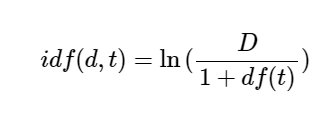

tf - idf = tf * idf



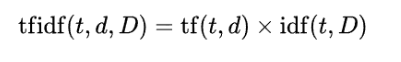

In [40]:
!pip install scikit-learn

In [42]:
from sklearn.feature_extraction.text import TfidVectorizer
tfidf_vectorizer=sklearn.feature_extraction.text.TfidVectorizer(
    input="content",
    encoding="utf-8",
    lowercase=True,
    stop_words=None,
    ngram_range=(1,1),
    max_df=1.0,
    min_df=1,
    vocabulary=None,
    smooth_idf=True
)

ImportError: cannot import name 'TfidVectorizer' from 'sklearn.feature_extraction.text' (/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py)

In [43]:
from sklearn.feature_extraction.text import TfidVectorizer
corpus=[
    "that movie was fun",
    "i like this actor",
    "i don't like that actor"
]

tfidf_vectorizer=TfidVectorizer()
tfidf_vectorizer.fit(corpus)
tfidf_matrix=tfidf_vectorizer.transform(corpus)

print(tfidf_matrix.toarray())
print(tfdif_vectorizer.vocabulary_)

ImportError: cannot import name 'TfidVectorizer' from 'sklearn.feature_extraction.text' (/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py)

word2vec

분포 가설 = 같은 문맥에서 등장하는 자주 등장하는 단어는 서로 유사한 의미를 가질 가능성이 높음

단어 벡터화
  - 희소 표현 = 코퍼스의 갯수에 따라서 벡터의 갯수가 정해짐
  - 밀집 표현 = 이미 지정된 차원의 벡터 개수에 맞춰 각 벡터를 표현함

밀집표현의 방식
  - cbow = 중심 단어를 기준으로 윈도우 크기만큼 비교함

  각 입력 단어의 원-핫 벡터를 입력값으로 받고
  문장 내의 모든 단어의 임베딩 벡터를 평균내어 중심 벡터 파악
  



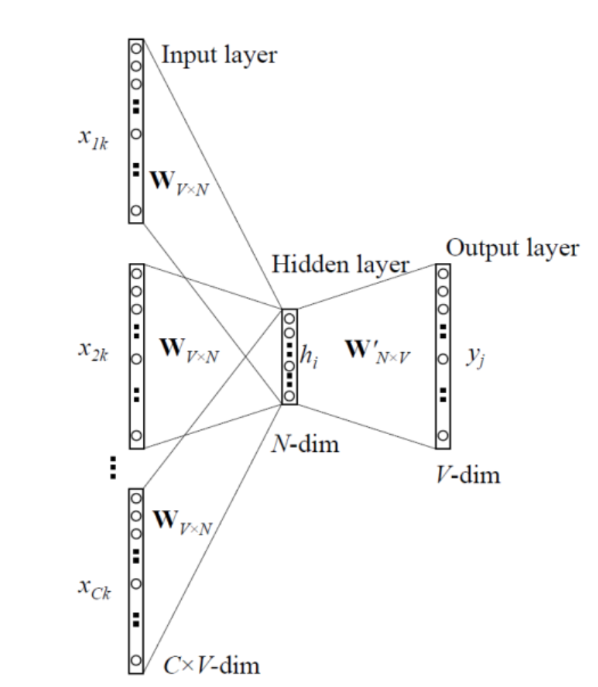

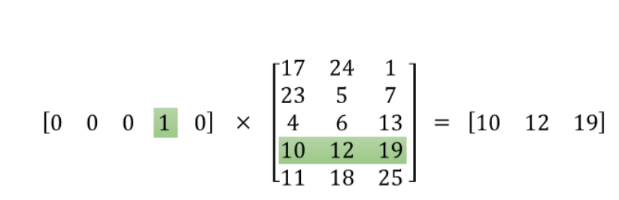

skip-gram
- 중심 단어를 받아서 주변 벡터 예측함


계층적 소프트맥스
- 자주 등장하는 단어를 상위층에, 안 등장하는 단어를 하위층에 배치함
- 각 단어의 확률은 경로노드의 확률을 곱해서 표현함

네거티브 샘플링
- 전체 단어에서 일부 단어를 샘플링해서 오답 단어로 사용함

- 입력 데이터와 출력 데이터가 맞는지 아닌지에 대한 이진 분류로 바뀌게 됨


In [45]:
import torch

In [48]:
embedding=torch.nn.Embedding(
  num_embeddings,
  embeddings_dim, #임베딩 차원 갯수
  padding_idx=None, #문장 길이를 일정 길이로 패딩
  max_norm=None, #임베딩 벡터 크기 제한
  norm_type=2.0 # 임베딩 벡터의 최대 크기
)

NameError: name 'num_embeddings' is not defined

In [47]:
from torch import nn

class VanillaSkipgram(nn.Module):
  def __init__(self,vocab_size,embedding_dim):
    super().__init__()
    self.embedding=nn.Embedding(
        num_embeddings=vocab_size,
        embedding_dim=embedding_dim
    )
    self.linear=nn.Linear(
        in_features=embedding_dim,
        out_features=vocab_size
    )

  def forward(self,input_ids):
    embeddings=self.embedding(input_ids)
    output=self.linear(embeddings)
    return output

In [50]:
!pip install Korpora


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 1.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
from Korpora import Korpora
from konlpy.tag import Okt

corpus=Korpora.load("nsmc")
corpus=pd.DataFrame(corpus.test)

tokenizer=Okt()
tokens=[tokenizer.morphs(review) for review in corpus.text]
print(tokens[:3])


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : e9t@github
    Repository : https://github.com/e9t/nsmc
    References : www.lucypark.kr/docs/2015-pyconkr/#39

    Naver sentiment movie corpus v1.0
    This is a movie review dataset in the Korean language.
    Reviews were scraped from Naver Movies.

    The dataset construction is based on the method noted in
    [Large movie review dataset][^1] from Maas et al., 2011.

    [^1]: http://ai.stanford.edu/~amaas/data/sentiment/

    # License
    CC0 1.0 Universal (CC0 1.0) Public Domain Dedication
    Details in https://creativecommons.org/publicdomain/zero/1.0/



[nsmc] download ratings_train.txt: 14.6MB [00:00, 154MB/s]
[nsmc] download ratings_test.txt: 4.90MB [00:00, 99.7MB/s]


[['굳', 'ㅋ'], ['GDNTOPCLASSINTHECLUB'], ['뭐', '야', '이', '평점', '들', '은', '....', '나쁘진', '않지만', '10', '점', '짜', '리', '는', '더', '더욱', '아니잖아']]


In [7]:
from collections import Counter

def build_vocab(corpus,n_vocab,special_tokens):
  counter=Counter()
  for tokens in corpus:
    counter.update(tokens)
  vocab=special_tokens #oov(모르는 단어)가 생기면 스페셜 토큰으로 변경시킴
  for token, count in counter.most_common(n_vocab):
    vocab.append(token)
  return vocab

vocab=build_vocab(corpus=tokens,n_vocab=5000,special_tokens=["<unk>"])
token_to_id={token:idx for idx, token in enumerate(vocab)}
id_to_token={idx:token for idx, token in enumerate(vocab)}

print(vocab[:10])
print(len(vocab))

['<unk>', '.', '이', '영화', '의', '..', '가', '에', '...', '을']
5001


In [8]:
def get_word_pairs(tokens,window_size): #skipgram을 통한 단어쌍 추출
  pairs=[]
  for sentence in tokens:
    sentence_length=len(sentence)
    for idx,center_word in enumerate(sentence):
      window_start=max(0,idx-window_size)
      window_end=min(sentence_length,idx+window_size+1)
      center_word=sentence[idx]
      context_words=sentence[window_start:idx]+sentence[idx+1:window_end]
      for context_word in context_words:
        pairs.append([center_word,context_word])

  return pairs

word_pairs=get_word_pairs(tokens,window_size=2)
print(word_pairs[:5])

[['굳', 'ㅋ'], ['ㅋ', '굳'], ['뭐', '야'], ['뭐', '이'], ['야', '뭐']]


In [9]:
def get_index_pairs(word_pairs,token_to_id):#단어쌍의 인덱스 쌍으로 변환
  pairs=[]
  unk_index=token_to_id["<unk>"]
  for word_pair in word_pairs:
    center_word,context_word=word_pair
    center_index=token_to_id.get(center_word,unk_index)
    context_index=token_to_id.get(context_word,unk_index)
    pairs.append([center_index,context_index])
  return pairs

index_pairs=get_index_pairs(word_pairs,token_to_id)
print(index_pairs[:5])

[[595, 100], [100, 595], [77, 176], [77, 2], [176, 77]]


In [11]:
import torch
from torch.utils.data import TensorDataset, DataLoader #데이터셋 로드

index_pairs=torch.tensor(index_pairs)
center_indexs=index_pairs[:,0]
context_indexs=index_pairs[:,1]

dataset=TensorDataset(center_indexs,context_indexs)
dataloaer=DataLoader(dataset,batch_size=32,shuffle=True)

<ipython-input-11-c78058d6a836>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  index_pairs=torch.tensor(index_pairs)


각 단어에 임베딩을 적용해 벡터를 구함

해당 벡터들의 코사인 유사도를 통한 단어간의 유사도 계산  